<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_01b_pandas_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Construyendo Data Frame desde diccionarios  y cargando datos del un data frame


In [271]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [272]:
def PascalCase(s):
    return ["".join([i.capitalize() for i in col.split("_")]) for col in s]

# Problema: Dataset de pingüinos:

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```












1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?

In [273]:
# Cargar el dataset
Ping = sns.load_dataset('penguins')

In [274]:
Ping.columns = PascalCase(Ping.columns)
Ping

,Species,Island,BillLengthMm,BillDepthMm,FlipperLengthMm,BodyMassG,Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Hay filas que no tienen ninguna información adicional al nombre, por lo tanto, las elimino.

In [275]:
colum = ['BillLengthMm', 'BillDepthMm', 'FlipperLengthMm', 'BodyMassG', 'Sex']

# Eliminar filas donde todas las columnas de medidas importantes sean NaN
Ping = Ping.dropna(subset=colum, how='all')
Ping

,Species,Island,BillLengthMm,BillDepthMm,FlipperLengthMm,BodyMassG,Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


1. ¿Cuántas especies de pinguinos hay?

In [276]:
print("Hay {} especies de pinguinos, estas son: {}".format(len(Ping.Species.unique()), Ping.Species.unique()))

Hay 3 especies de pinguinos, estas son: ['Adelie' 'Chinstrap' 'Gentoo']


2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

In [277]:
print('La longitud media es {} mm'.format(np.mean(Ping['BillLengthMm'])))

La longitud media es 43.9219298245614 mm


3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

In [278]:
masam = Ping[Ping.Species == 'Gentoo']['BodyMassG'].mean()

print('La masa corporal promedio de los Gentoo es {} g'.format(masam))

La masa corporal promedio de los Gentoo es 5076.016260162602 g


4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?


In [279]:
x = Ping['BillLengthMm']
y = Ping['BodyMassG']

m, b, r, p, stderr = stats.linregress(x, y)

# Generar los valores ajustados
y_fit = m*x + b

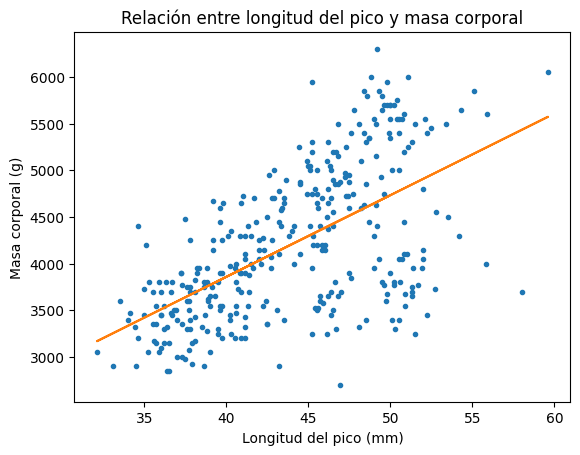

In [280]:
plt.plot(x, y, '.')
plt.plot(x, y_fit)
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.title('Relación entre longitud del pico y masa corporal')
plt.show()

Vemos que hay una relación directamente proporcional entre estas 2 variables.

5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?


In [281]:
totmax_pin = Ping.Island.value_counts().max()
Isla_totmax = Ping.Island.value_counts().idxmax()
print('La isla con mayor pinguinos es {} con un total de {} pinguinos'.format(Isla_totmax,totmax_pin))

La isla con mayor pinguinos es Biscoe con un total de 167 pinguinos


6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?


In [282]:
print('La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es {}'.format(Ping[Ping.Species == 'Chinstrap']['FlipperLengthMm'].std()))

La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es 7.131894258578147


7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?


In [283]:
Ping[Ping.BillLengthMm == Ping.BillLengthMm.max()][['Species','Island', 'BillLengthMm']]

,Species,Island,BillLengthMm
253,Gentoo,Biscoe,59.6


8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?


In [303]:
Tot_Adel = Ping[Ping.Species == 'Adelie']['Species'].count()
Pro_male = 100*Ping[(Ping.Species == 'Adelie') & (Ping.Sex == 'Male')]['Species'].count()/Tot_Adel
Pro_female = 100*Ping[(Ping.Species == 'Adelie') & (Ping.Sex == 'Female')]['Species'].count()/Tot_Adel

print('Hay un {}% de Machos y un {}% de hembras'.format(Pro_male, Pro_female))

Hay un 48.34437086092715% de Machos y un 48.34437086092715% de hembras


9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [286]:
x1 = Ping[Ping.Species == 'Gentoo']['BillLengthMm']
y1 = Ping[Ping.Species == 'Gentoo']['BodyMassG']
x2 = Ping[Ping.Species == 'Adelie']['BillLengthMm']
y2 = Ping[Ping.Species == 'Adelie']['BodyMassG']
x3 = Ping[Ping.Species == 'Chinstrap']['BillLengthMm']
y3 = Ping[Ping.Species == 'Chinstrap']['BodyMassG']

m1, b1, r, p, stderr = stats.linregress(x1, y1)
m2, b2, r, p, stderr = stats.linregress(x2, y2)
m3, b3, r, p, stderr = stats.linregress(x3, y3)

# Generar los valores ajustados
y_fit1 = m1*x1 + b1
y_fit2 = m2*x2 + b2
y_fit3 = m3*x3 + b3

Text(0.5, 1.0, 'Relación entre longitud del pico y masa corporal')

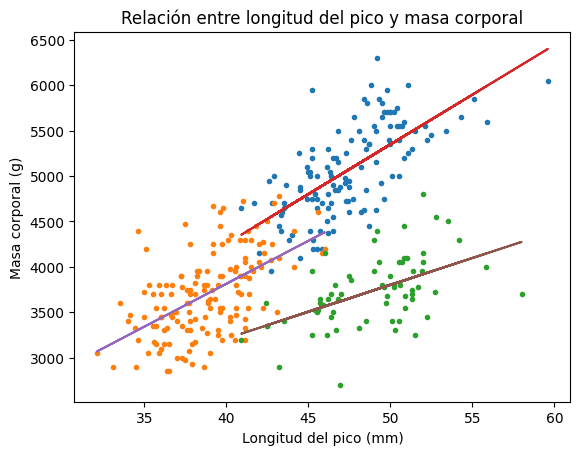

In [287]:
plt.plot(x1, y1, '.')
plt.plot(x2, y2, '.')
plt.plot(x3, y3, '.')
plt.plot(x1, y_fit1)
plt.plot(x2, y_fit2)
plt.plot(x3, y_fit3)
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.title('Relación entre longitud del pico y masa corporal')

In [288]:
print('La correlación entre las 2 variables en las 3 especies son las siguientes:',x1.corr(y1), x2.corr(y2), x3.corr(y3))

La correlación entre las 2 variables en las 3 especies son las siguientes: 0.6691661646930205 0.5488658064533206 0.5136383479489105


10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

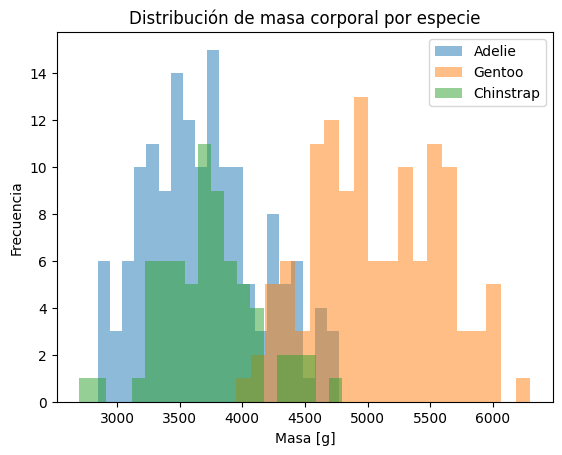

In [289]:
plt.hist(Ping[Ping.Species == 'Adelie']['BodyMassG'], bins=20, alpha=0.5, label='Adelie')
plt.hist(Ping[Ping.Species == 'Gentoo']['BodyMassG'], bins=20, alpha=0.5, label='Gentoo')
plt.hist(Ping[Ping.Species == 'Chinstrap']['BodyMassG'], bins=20, alpha=0.5, label='Chinstrap')
plt.xlabel('Masa [g]')
plt.ylabel('Frecuencia')
plt.title('Distribución de masa corporal por especie')
plt.legend()


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [290]:
Ping.groupby('Species')['FlipperLengthMm'].agg(['min','max'])

,min,max
Species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

In [291]:
print('Hay {} pinguinos con masa corporal superior a 5000'.format(Ping[Ping.BodyMassG > 5000]['Species'].count()))

Hay 61 pinguinos con masa corporal superior a 5000


13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [292]:
Ping.groupby(['Island','Species'])['BillLengthMm'].agg(['mean'])

mean
Island    Species             
Biscoe    Adelie     38.975000
          Gentoo     47.504878
Dream     Adelie     38.501786
          Chinstrap  48.833824
Torgersen Adelie     38.950980

In [293]:
38.501786-48.833824

-10.332037999999997

En la isla Biscoe sólo hay 2 especies, entre estas especies, el promedio de la longitud del pico varia en 8.53 mm.
Entre las 2 especies en la isla Biscoe, el promedio de la longitud del pico varia en 10.33 mm y en la isla Torgensen sólo hay una isla.

14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?



Text(0, 0.5, 'Masa corporal [g]')

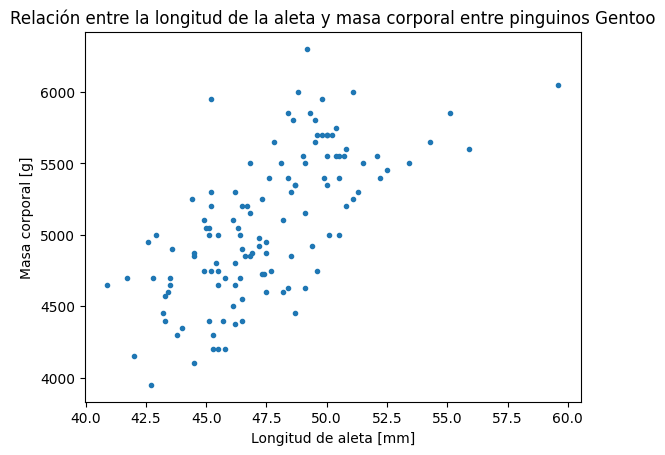

In [294]:
plt.plot(Ping[Ping.Species == 'Gentoo']['BillLengthMm'], Ping[Ping.Species == 'Gentoo']['BodyMassG'], '.')
plt.title('Relación entre la longitud de la aleta y masa corporal entre pinguinos Gentoo')
plt.xlabel('Longitud de aleta [mm]')
plt.ylabel('Masa corporal [g]')

Vemos que hay una relación directamente proporcional con los datos dispersos.

15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?



In [295]:
Total_nan = Ping.isna().sum()
print(Total_nan)

Species            0
Island             0
BillLengthMm       0
BillDepthMm        0
FlipperLengthMm    0
BodyMassG          0
Sex                9
dtype: int64


16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


No entendí muy bien a qué se refiere esta y la pregunta 12. Por eso doy 2 respuestas diferentes. Podría ser la variación que hay en longitudes entre las especies de la isla (aunque una isla sólo tiene una especie) o cómo varía la longitud para cada especie en cada isla (que es lo que hago en este punto)

In [296]:
Ping.groupby(['Island','Species'])['BillLengthMm'].agg('std')

Island     Species  
Biscoe     Adelie       2.480916
           Gentoo       3.081857
Dream      Adelie       2.465359
           Chinstrap    3.339256
Torgersen  Adelie       3.025318
Name: BillLengthMm, dtype: float64

17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

In [304]:
mprom_male = Ping[(Ping.Species == 'Chinstrap') & (Ping.Sex == 'Male')].BodyMassG.mean()
mprom_female = Ping[(Ping.Species == 'Chinstrap') & (Ping.Sex == 'Female')].BodyMassG.mean()

print('La diferencia en masa corporal promedio entre machos y hembras Chinstrap es {} g'.format(mprom_male-mprom_female))

La diferencia en masa corporal promedio entre machos y hembras Chinstrap es 411.76470588235316 g


18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?



In [298]:
Ping.groupby('Species')['FlipperLengthMm'].mean()

Species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: FlipperLengthMm, dtype: float64

La especie con la longitud de aleta más alta en promedio es Gentoo

19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?



In [299]:
Ping[Ping['BillLengthMm'] == Ping['BillLengthMm'].min()][['Species','BillLengthMm']]

,Species,BillLengthMm
142,Adelie,32.1


20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

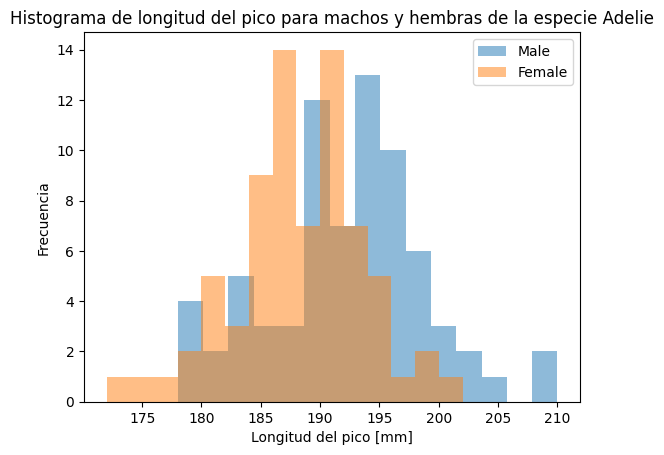

In [306]:
Ping[Ping.Species == 'Adelie']['FlipperLengthMm'].mean()

alemale = Ping[(Ping.Species == 'Adelie') & (Ping.Sex == 'Male')]['FlipperLengthMm']
alefemale = Ping[(Ping.Species == 'Adelie') & (Ping.Sex == 'Female')]['FlipperLengthMm']

plt.hist(alemale, bins=15, alpha=0.5, label='Male')
plt.hist(alefemale, bins=15, alpha=0.5, label='Female')
plt.title('Histograma de longitud del pico para machos y hembras de la especie Adelie')
plt.xlabel('Longitud del pico [mm]')
plt.ylabel('Frecuencia')
plt.legend()

Vemos que hay diferencias entre la longitud de los picos entre machos y hembras de este especie. Los machos llegan a tener picos más largos mientras que las hembras alcanzan valores más pequeños.